# Topic 7 Example 8

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

try: 
    from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
except:
    %pip install sympy
from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, cos, arg, atan2, re, cos, exp_polar, pi
from sympy.abc import A,B,t,f,y,z
from sympy import re, im 

Running Python: 3.8.19
Running Sympy: 1.12.1


In [2]:
tlim = 4
tt = np.linspace(-tlim, tlim, 1000)
flim = 2
ff = np.linspace(-flim, flim, 1000)
ts = Symbol('t')

def my_rect(p = 1):
    return Piecewise((0, t <= -p/2),(1, t <= p/2),(0, True))

def my_tri(p = 1, tc = 0):
    return Piecewise((0, t <= tc-p),(t - (tc-p) , t <= tc),(tc + p-t, t <= tc+p),(0, True))

lam_rect = lambdify([t,y], my_rect(y), modules=['numpy'])
lam_tri = lambdify([t,y,z], my_tri(y,z), modules=['numpy'])

p = Symbol('p')
sincu = lambda t,p: sinc(p*pi*t) # swithc to sinc ftn that evetyone else uses...

In [3]:
f7a = my_tri(1,-1) + my_tri(1,0) + my_tri(1,1)
lam_f7a = lambdify(t, f7a, modules=['numpy'])
Q7a = fourier_transform(f7a, t, f)
lam_Q7a = lambdify(f, re(Q7a), modules=['numpy'])

# see section 7.6
def Q7_analytic(f):
    return (1+2*np.cos(2*np.pi*f))*np.sinc(f)**2 ## numpy sinc doesn't require the pi, sympy's does

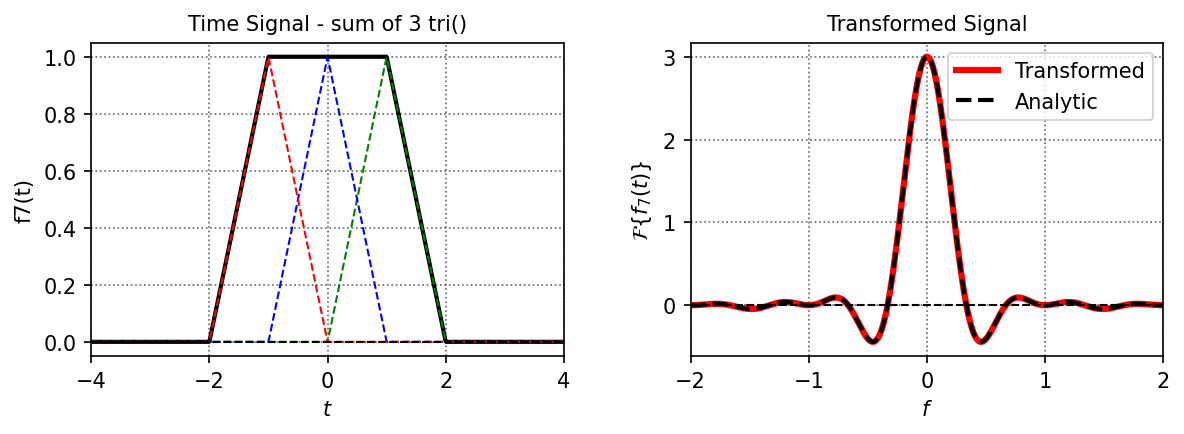

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), dpi=150)
ax1.plot(tt, lam_f7a(tt), 'k-', lw=2)
ax1.plot(tt, lam_tri(tt-1,1,0), 'g--', lw=1)
ax1.plot(tt, lam_tri(tt,1,0), 'b--', lw=1)
ax1.plot(tt, lam_tri(tt+1,1,0), 'r--', lw=1)
ax1.set_title('Time Signal - sum of 3 tri()')
ax1.set_ylabel('f7(t)')
ax1.set_xlabel('$t$')
nicegrid(ax1)

ax2.plot(ff, lam_Q7a(ff), 'r-', lw=3,label='Transformed')
ax2.plot(ff, Q7_analytic(ff), 'k--', lw=2,label='Analytic')
ax2.set_title('Transformed Signal')
ax2.set_ylabel('${\cal F}\{ f_7(t)\}$')
ax2.set_xlabel('$f$')
nicegrid(ax2)
plt.legend()
plt.show()

## Example - Truncated Cosine - Multiplication/Convolution

In [5]:
p = 1
m = 10
SS6 = my_rect(p)*cos(2*pi*m*t)
lam_SS6 = lambdify(t, SS6, modules=['numpy'])
QSS6 = fourier_transform(SS6, t, f)
lam_QSS6 = lambdify(f, QSS6, modules=['numpy'])

def QSS6_analytic(f):
    return p/2*(np.sinc(p*f-p*m) + np.sinc(p*f+p*m)) ## numpy sinc doesn't require the pi, sympy's does

tlim = 20/m
tt = np.linspace(-tlim, tlim, 1000)
flim = 1/p+2*m
ff = np.linspace(-flim, flim, 1000)
ts = Symbol('t')

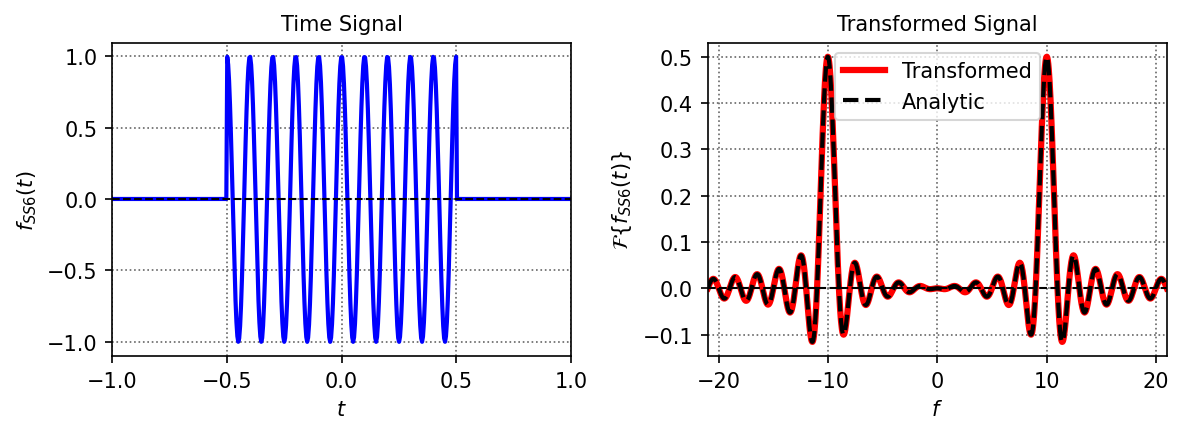

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), dpi=150)
ax1.plot(tt, lam_SS6(tt), 'b-', lw=2)
ax1.set_title('Time Signal')
ax1.set_ylabel('$f_{SS6}(t)$')
ax1.set_xlabel('$t$')
ax1.set_xlim(-1,1)
nicegrid(ax1)

ax2.plot(ff, lam_QSS6(ff), 'r-', lw=3,label='Transformed')
ax2.plot(ff, QSS6_analytic(ff), 'k--', lw=2,label='Analytic')
ax2.set_title('Transformed Signal')
ax2.set_ylabel('${\cal F}\{ f_{SS6}(t)\}$')
ax2.set_xlabel('$f$')
nicegrid(ax2)
plt.legend()
plt.show()